# Exploratory Data Analysis Theory Digital Assignment

- **Name**: *Pushkar Kumar Gautam*
- **Registration Number**: *21BDS0049*
- **Course Name**: *Exploratory Data Analysis*
- **Slot**: *C1*
- **GitHub Link**: https://github.com/kumargautampushkar/EDA_theory_DA_vit

---
---

## Module 1 Introduction to Exploratory Data Analysis


In [32]:
import numpy as np
import pandas as pd
import os

cwd = os.getcwd()
print(cwd)
"Dataset\auto-mpg.csv"

# for windows
df_path = os.path.join(cwd,"Dataset\\auto-mpg.csv")

# for linux
df_path = os.path.join(cwd,"Dataset/auto-mpg.csv")

df = pd.read_csv(df_path)


f:\coding\sem_7_acad\EDS_theory\EDA_theory_DA_vit


In [33]:
display(df.head())
display(df.sample(5))

display(df.info())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
13,14.0,8,455.0,225,3086,10.0,70,1,buick estate wagon (sw)
94,13.0,8,440.0,215,4735,11.0,73,1,chrysler new yorker brougham
60,20.0,4,140.0,90,2408,19.5,72,1,chevrolet vega
164,21.0,6,231.0,110,3039,15.0,75,1,buick skyhawk
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


None

---
---

## Module 2: Data Transformation



In [34]:
## checking for duplicate values

print(f"Number of duplicate records in this dataset is: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()


Number of duplicate records in this dataset is: 0


In [35]:
df.replace('?', np.nan, inplace=True)


## checking for null valuses
display(df.isna().sum())
display(df.isna().sum().sum())

total_null = df.isna().sum().sum()
print(f"Total null values in this dataset are {total_null}")

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car_name        0
dtype: int64

np.int64(6)

Total null values in this dataset are 6


In [36]:
df["horsepower"].fillna(df["horsepower"], inplace = True)

In [42]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower_bins'] = pd.cut(df['horsepower'], bins=3, labels=['Low', 'Medium', 'High'])

In [43]:
display(df.head())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name,horsepower_bins
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,Medium
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,Medium
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,Medium
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,Medium
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,Medium


---
---

## Module 3: Correlation Analysis and Time Series Analysis


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


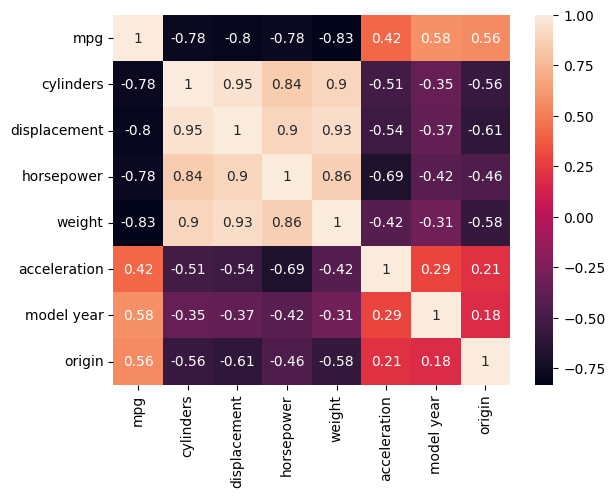

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df.drop(["car_name","horsepower_bins"],axis=1)

display(df_corr.corr())
sns.heatmap(df_corr.corr(), annot=True)
plt.show()

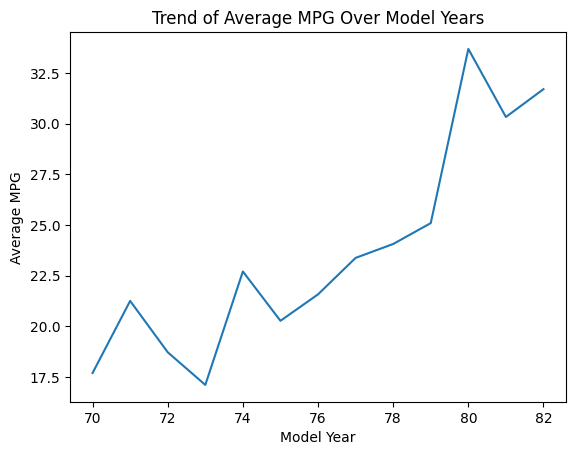

In [45]:
df.groupby('model year')['mpg'].mean().plot()
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.title('Trend of Average MPG Over Model Years')
plt.show()

---
---

## Module:4 Data Summarization and Visualization

In [46]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(exclude=[np.number]).columns


Summary statistics for numerical features:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


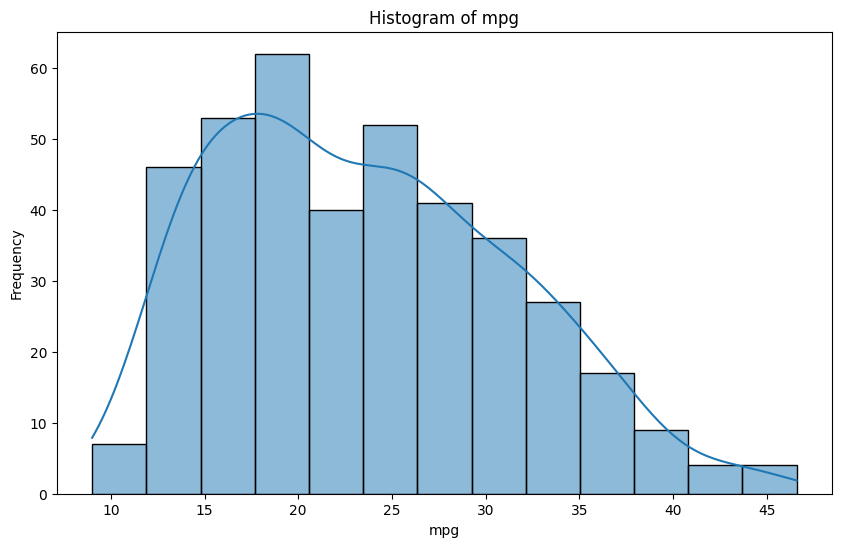

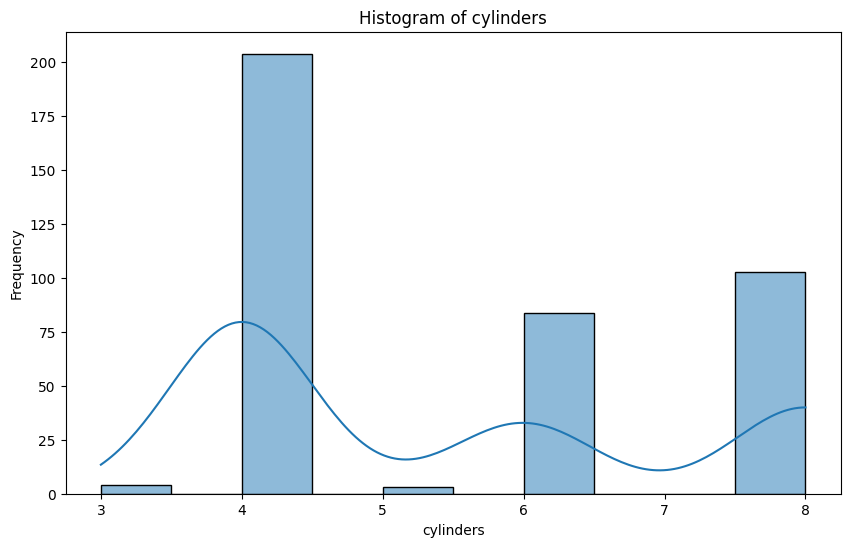

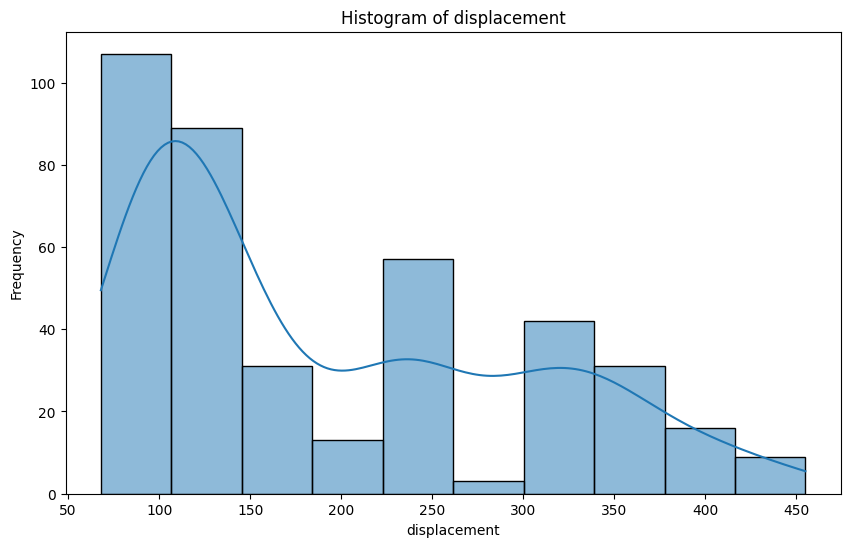

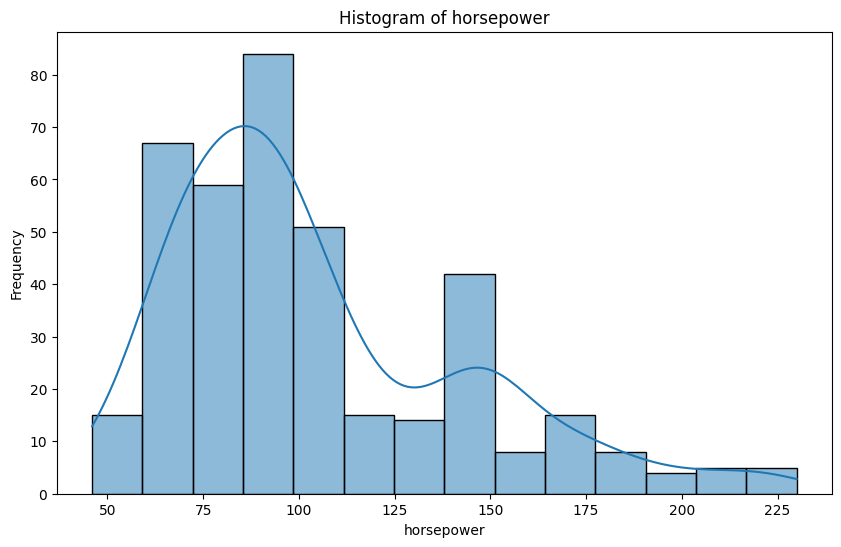

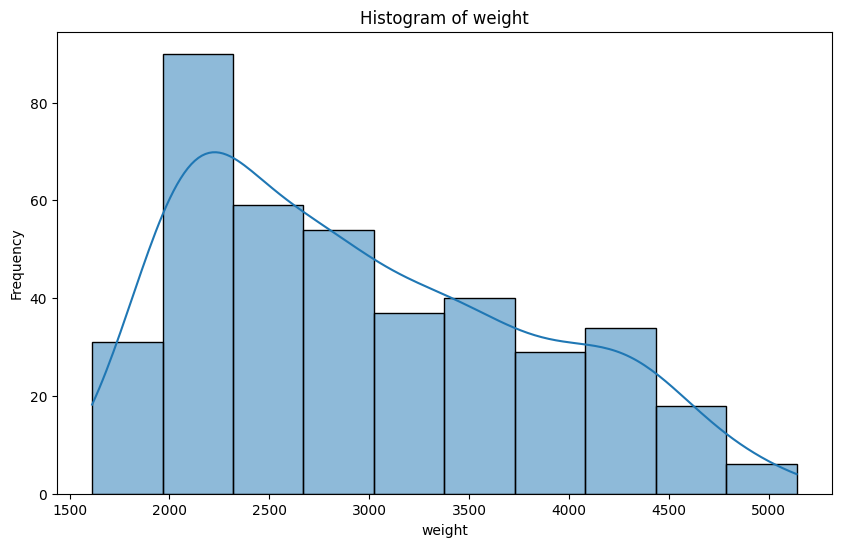

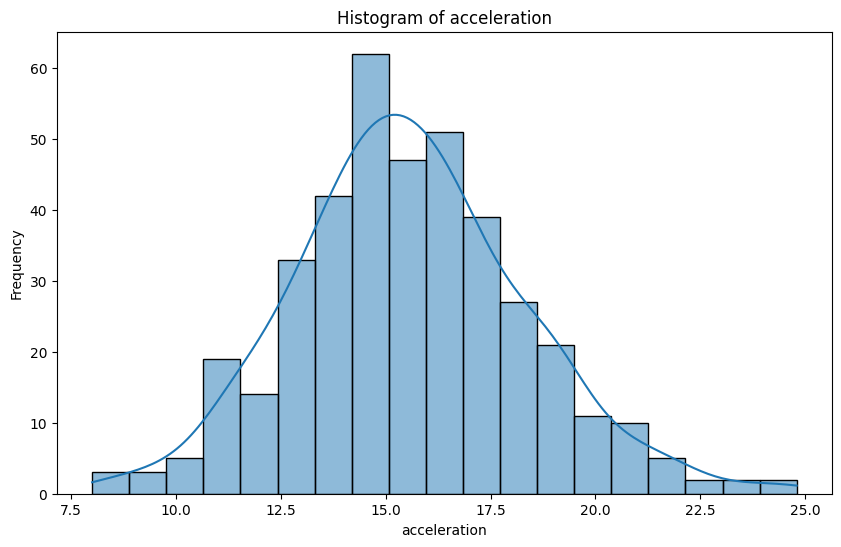

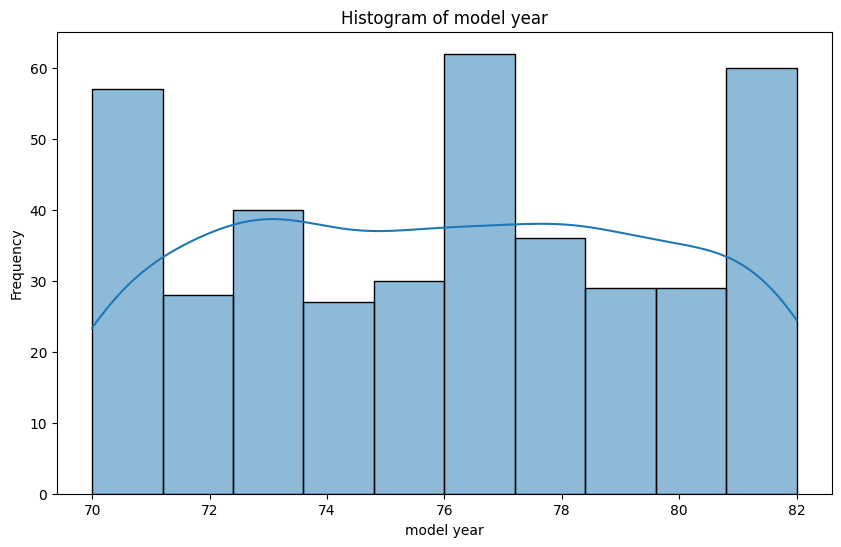

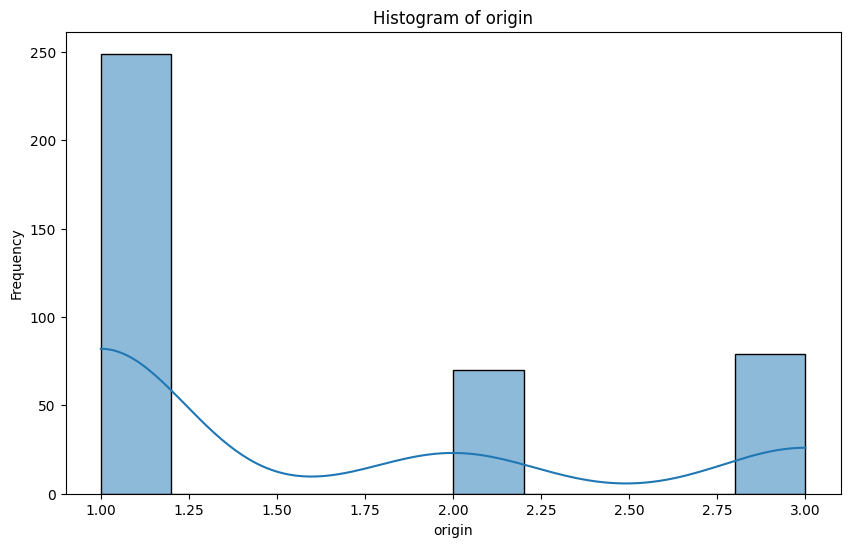

In [48]:
# Function to plot histograms for numerical features
def plot_numerical(df, columns):
    for col in columns:
        plt.figure(figsize=(10,6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# Calculate and print summary statistics for numerical features
print("\nSummary statistics for numerical features:")
display(df[numerical_features].describe())

# Plot histograms for numerical features
plot_numerical(df, numerical_features)


Frequency counts for categorical features:

car_name:
car_name
ford pinto             6
ford maverick          5
amc matador            5
toyota corolla         5
amc hornet             4
                      ..
amc concord dl         1
volkswagen rabbit l    1
mazda glc custom l     1
mazda glc custom       1
chevy s-10             1
Name: count, Length: 305, dtype: int64

horsepower_bins:
horsepower_bins
Low       257
Medium    103
High       32
Name: count, dtype: int64


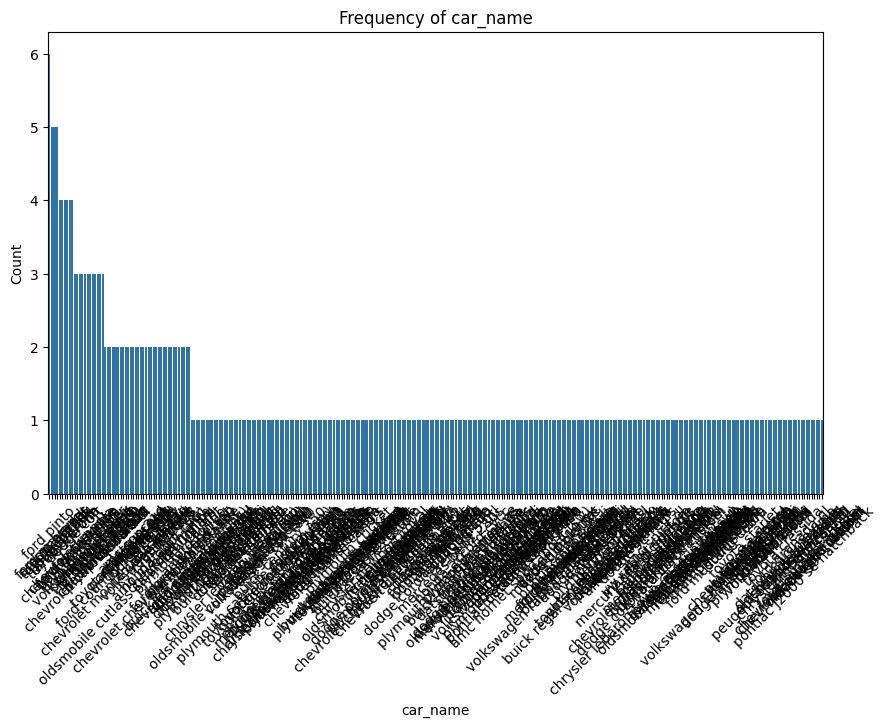

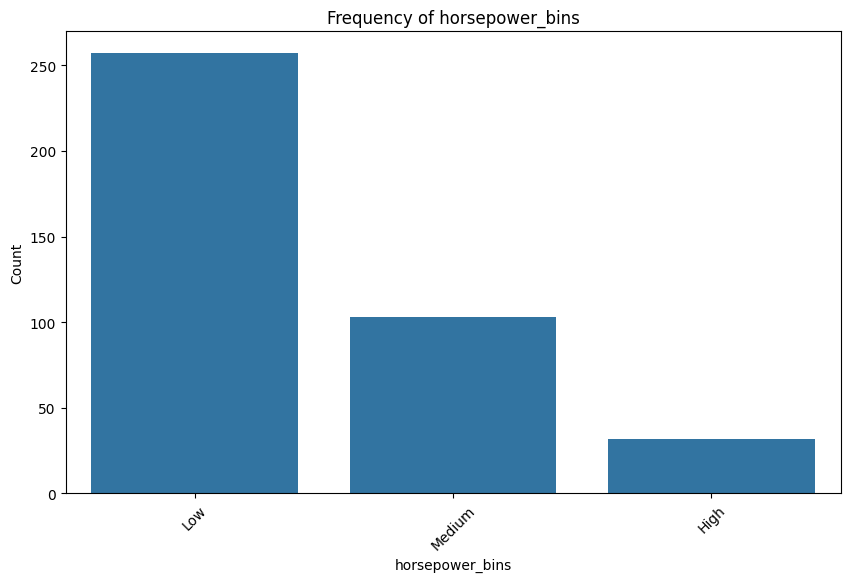

In [49]:
# Function to plot bar charts for categorical features
def plot_categorical(df, columns):
    for col in columns:
        counts = df[col].value_counts()
        plt.figure(figsize=(10,6))
        sns.barplot(x=counts.index, y=counts.values)
        plt.title(f'Frequency of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

# Calculate and print frequency counts for categorical features
print("\nFrequency counts for categorical features:")
for cat in categorical_features:
    print(f"\n{cat}:\n{df[cat].value_counts()}")

# Plot bar charts for categorical features
plot_categorical(df, categorical_features)

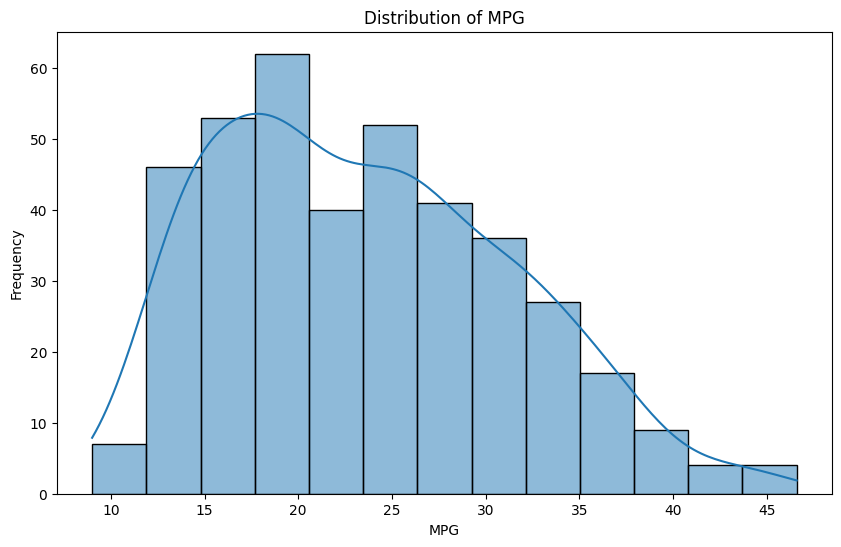

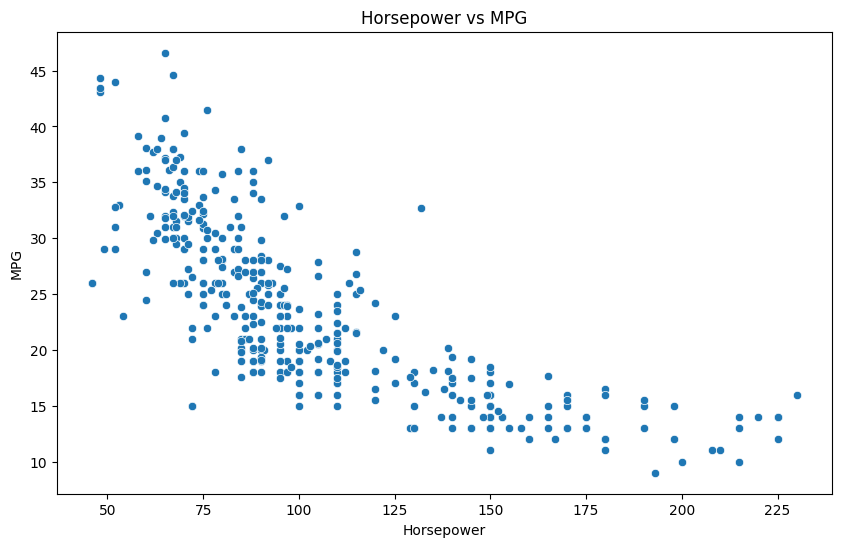

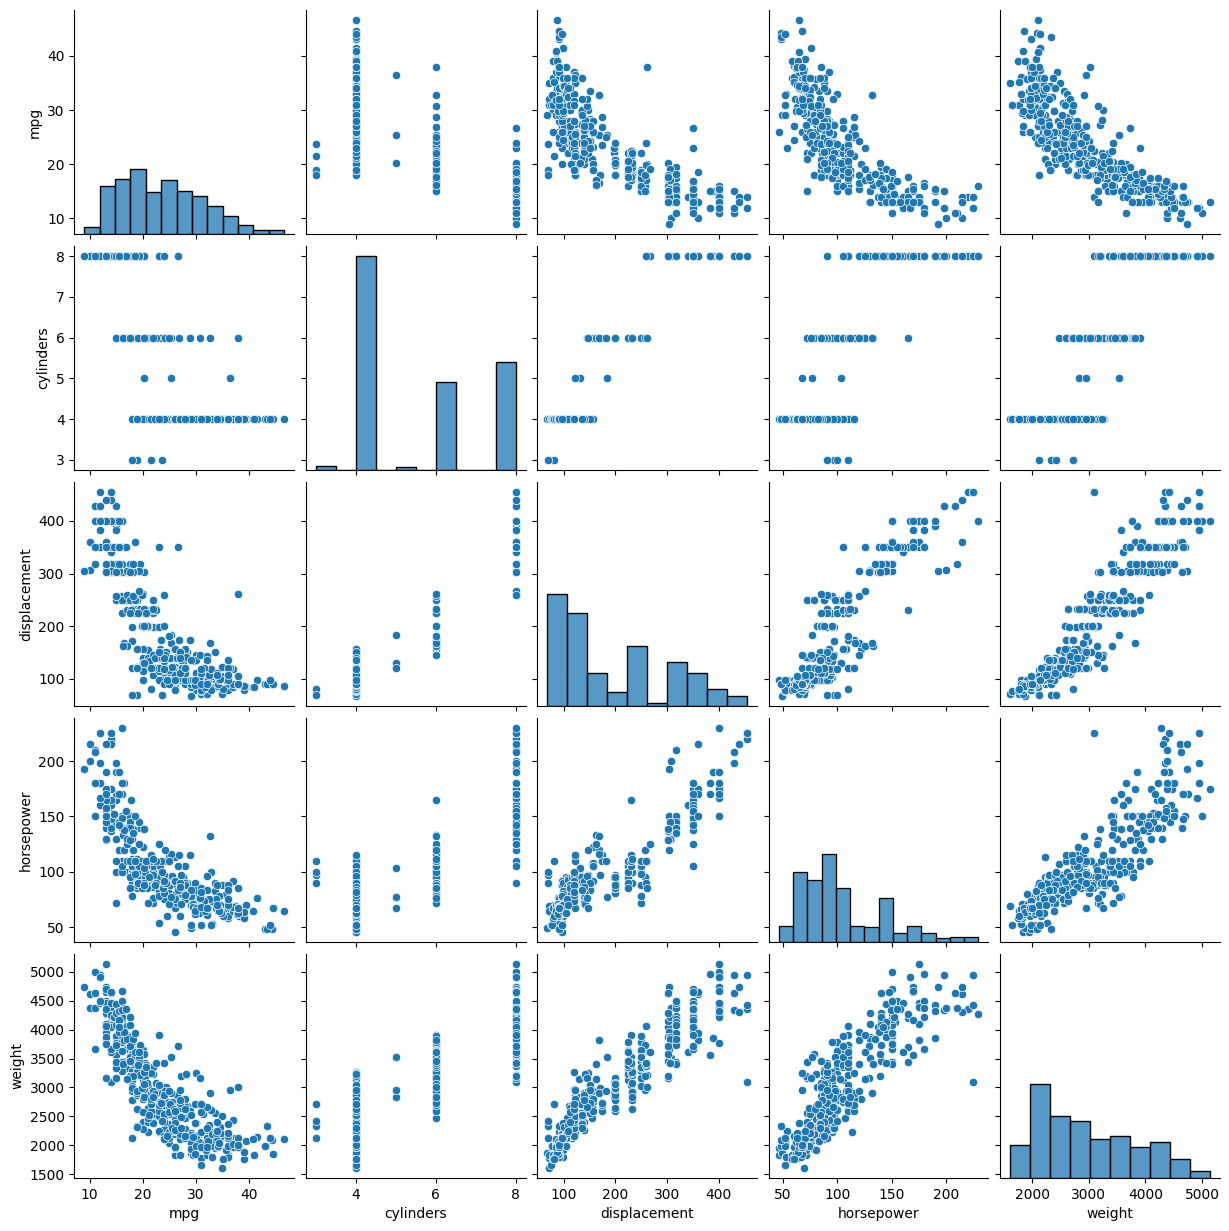


Contingency Table of Origin vs Cylinders:
cylinders  3   4  5   6    8
origin                      
1          0  72  0  74  103
2          0  63  3   4    0
3          4  69  0   6    0


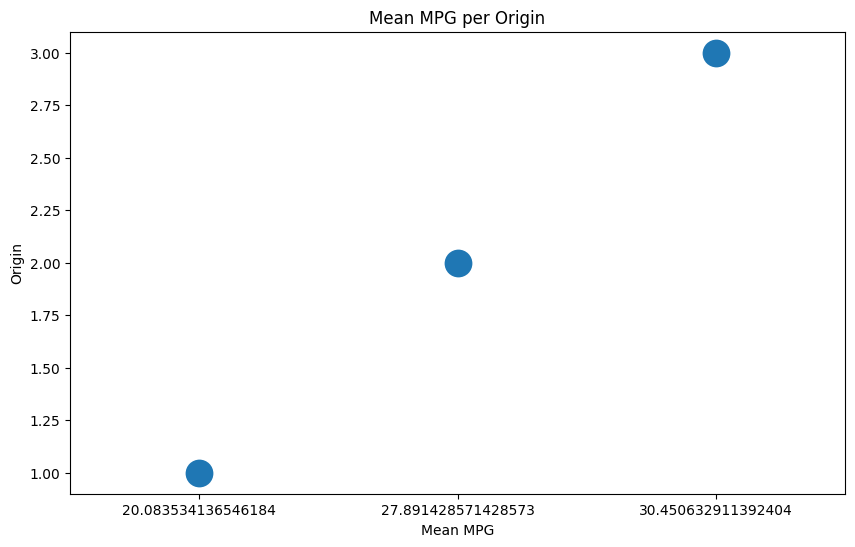

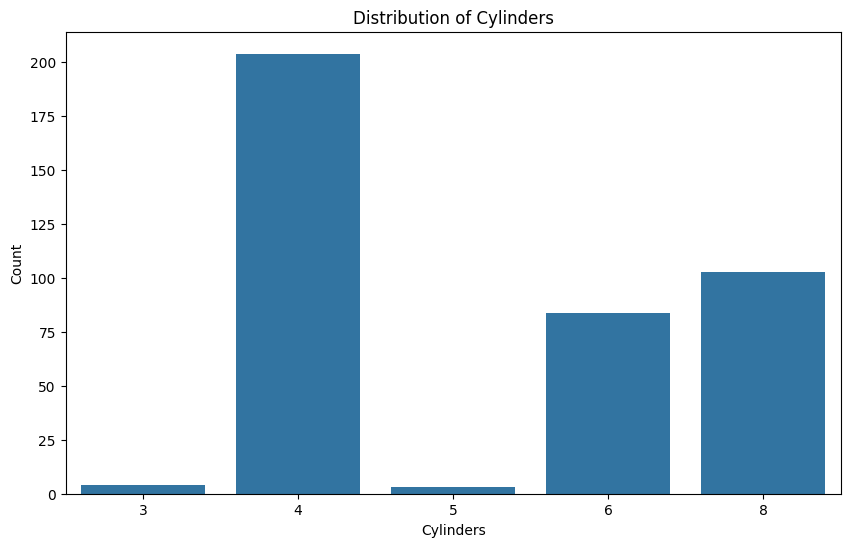

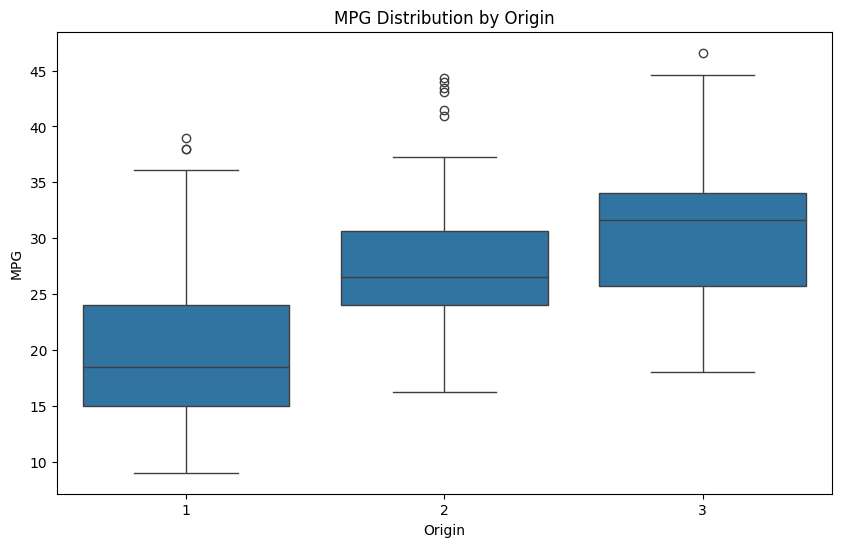

In [51]:
# Data elaboration: Create a new variable, e.g., mile per gallon per cylinder
df['mpg_per_cylinder'] = df['mpg'] / df['cylinders']

# 1-D Statistical Data Analysis: Distribution of mpg
plt.figure(figsize=(10,6))
sns.histplot(df['mpg'], kde=True)
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

# 2-D Statistical Data Analysis: Scatter plot of horsepower vs mpg
plt.figure(figsize=(10,6))
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.title('Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

# n-D Statistical Data Analysis: Pair plot of selected variables
variables = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']
sns.pairplot(df[variables])
plt.show()

# Contingency tables: Cross-tabulation of origin and cylinders
contingency_table = pd.crosstab(df['origin'], df['cylinders'])
print("\nContingency Table of Origin vs Cylinders:")
print(contingency_table)

# Visualization: Dot chart of mean mpg per origin
mean_mpg_origin = df.groupby('origin')['mpg'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.stripplot(x='mpg', y='origin', data=mean_mpg_origin, size=20, jitter=False)
plt.title('Mean MPG per Origin')
plt.xlabel('Mean MPG')
plt.ylabel('Origin')
plt.show()

# Visualization: Bar plot of cylinder distribution
plt.figure(figsize=(10,6))
sns.countplot(x='cylinders', data=df)
plt.title('Distribution of Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.show()

# Additional analysis: Box plot for mpg distribution by origin
plt.figure(figsize=(10,6))
sns.boxplot(x='origin', y='mpg', data=df)
plt.title('MPG Distribution by Origin')
plt.xlabel('Origin')
plt.ylabel('MPG')
plt.show()



---
---

##  Module 5: Clustering Algorithms

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, fcluster

In [60]:
# Exclude 'car name' and ensure 'origin' is numerical
df2 = df.drop('car_name', axis=1)

# Select features for clustering
features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
X = df2[features]
X["horsepower"].fillna(method = "ffill", inplace = True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\kumar\AppData\Local\Temp\ipykernel_28492\2310628884.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["horsepower"].fillna(method = "ffill", inplace = True)
C:\Users\kumar\AppData\Local\Temp\ipykernel_28492\2310628884.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X["horsepower"].fillna(method = "ffill", inplace = True)
C:\Users\kumar\AppData\Local\Temp\ipykernel_28492\2310628884.py:7: SettingWithCopyWarning: 
A value is 

In [65]:
# Compute distance matrix
dist_matrix = distance.pdist(X_scaled, metric='euclidean')
Z = linkage(dist_matrix, method='single')

# Form clusters
clusters_mst = fcluster(Z, t=3, criterion='maxclust')

# Evaluate clustering
silhouette_mst = silhouette_score(X_scaled, clusters_mst)
print(f'Silhouette Score for MST Clustering: {silhouette_mst}')

Silhouette Score for MST Clustering: -0.028099641376830624


In [66]:
# Apply Gaussian Mixture Model with 3 components
gmm = GaussianMixture(n_components=3, random_state=42)
clusters_gmm = gmm.fit_predict(X_scaled)

# Evaluate clustering
silhouette_gmm = silhouette_score(X_scaled, clusters_gmm)
print(f'Silhouette Score for GMM: {silhouette_gmm}')

Silhouette Score for GMM: 0.3220677447559236


In [67]:
# Apply Agglomerative Clustering with 3 clusters
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_agglo = agglo.fit_predict(X_scaled)

# Evaluate clustering
silhouette_agglo = silhouette_score(X_scaled, clusters_agglo)

print(f'Silhouette Score for Agglomerative Clustering: {silhouette_agglo}')

Silhouette Score for Agglomerative Clustering: 0.3089636465262859


---
---


## Module 6 

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.manifold import MDS, Isomap, TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_digits
from sklearn import datasets
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.linalg import svd
from sklearn.metrics import silhouette_score

In [76]:
# Load the dataset
df = pd.read_csv(df_path)

# Handle missing values
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'].fillna(df["horsepower"].mean(), inplace=True)

# df.drop("car_name")
# Encode categorical variables
df = pd.get_dummies(df, columns=['origin'], drop_first=True)

# Select numerical features
features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\kumar\AppData\Local\Temp\ipykernel_28492\3377046298.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df["horsepower"].mean(), inplace=True)


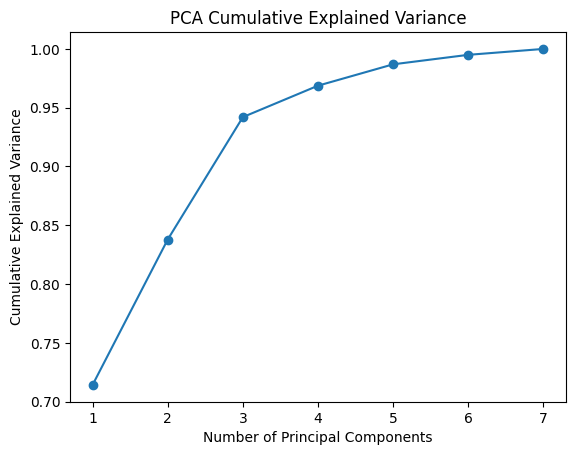

In [77]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.show()

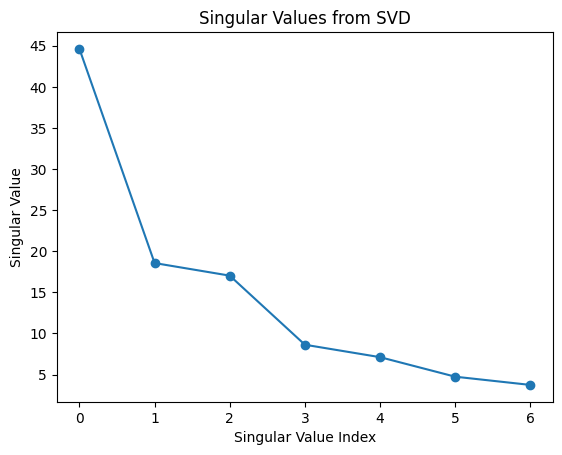

In [78]:
# Perform SVD
U, Sigma, Vt = svd(X_scaled, full_matrices=False)

# Plot singular values
plt.plot(Sigma, marker='o')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.title('Singular Values from SVD')
plt.show()

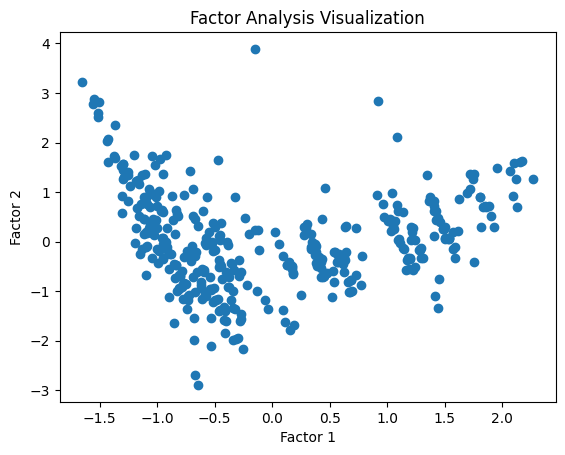

In [79]:
# Apply Factor Analysis
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X_scaled)

# Visualize Factor Analysis results
plt.scatter(X_fa[:, 0], X_fa[:, 1])
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Factor Analysis Visualization')
plt.show()

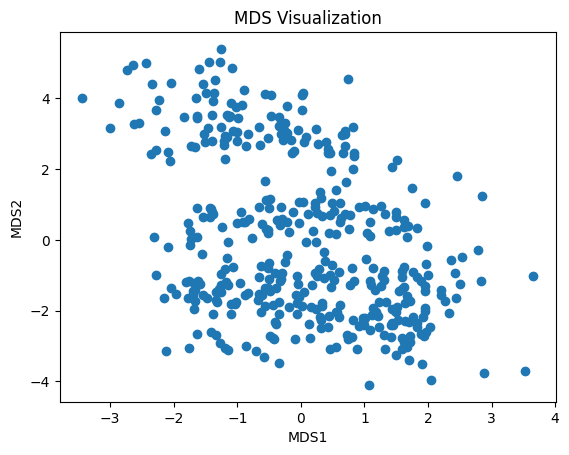

In [80]:
# Apply MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

# Visualize MDS results
plt.scatter(X_mds[:, 0], X_mds[:, 1])
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.title('MDS Visualization')
plt.show()

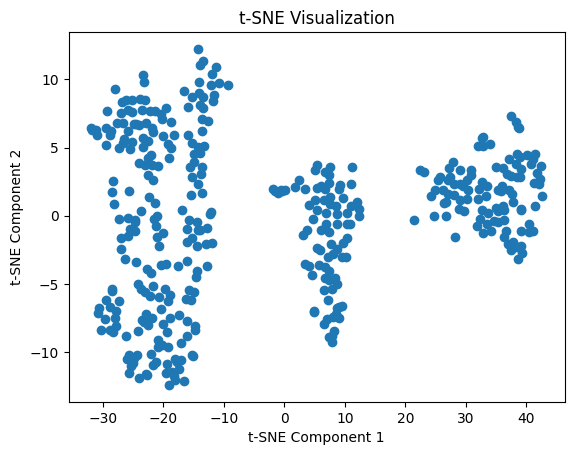

In [81]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize t-SNE results
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.show()

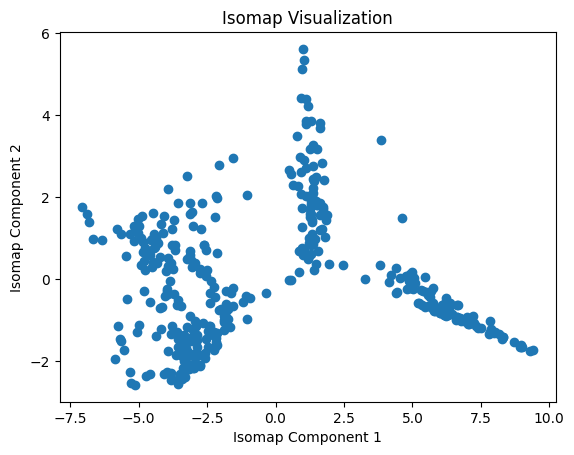

In [82]:
# Apply Isomap
isomap = Isomap(n_components=2, n_neighbors=5)
X_isomap = isomap.fit_transform(X_scaled)

# Visualize Isomap results
plt.scatter(X_isomap[:, 0], X_isomap[:, 1])
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.title('Isomap Visualization')
plt.show()

---
---

## Module 7: Model Development and Evaluation 

In [85]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(df_path)

# Check for missing values
print(df.isnull().sum())

# Handle missing values in horsepower
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

# Select features and target variable
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
X = df[features]
y = df['mpg']

# Encode categorical variables if necessary
# Assuming 'origin' is already encoded numerically

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)



mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car_name        0
dtype: int64
Mean Squared Error: 8.195452104073784
Root Mean Squared Error: 2.862770005444689
Mean Absolute Error: 2.2533884059317573
R-squared: 0.8475731044779434
R-squared (proportion of variance explained): 0.8475731044779434


C:\Users\kumar\AppData\Local\Temp\ipykernel_28492\1135446774.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)


In [84]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Understanding Accuracy in Regression
# R-squared can be interpreted as the proportion of variance explained by the model
print('R-squared (proportion of variance explained):', r2)

Mean Squared Error: 8.195452104073784
Root Mean Squared Error: 2.862770005444689
Mean Absolute Error: 2.2533884059317573
R-squared: 0.8475731044779434
R-squared (proportion of variance explained): 0.8475731044779434
